In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

0.0115830115830115 별 is_converted 비율: 2.66%, 전체 갯수: 788, is_converted된 갯수: 21
0.0201207243460764 별 is_converted 비율: 1.76%, 전체 갯수: 1365, is_converted된 갯수: 24
0.022633744855967 별 is_converted 비율: 2.81%, 전체 갯수: 713, is_converted된 갯수: 20
0.0227272727272727 별 is_converted 비율: 4.05%, 전체 갯수: 173, is_converted된 갯수: 7
0.0268456375838926 별 is_converted 비율: 2.97%, 전체 갯수: 1278, is_converted된 갯수: 38
0.0287769784172661 별 is_converted 비율: 3.00%, 전체 갯수: 200, is_converted된 갯수: 6
0.031578947368421 별 is_converted 비율: 9.96%, 전체 갯수: 271, is_converted된 갯수: 27
0.0344827586206896 별 is_converted 비율: 3.45%, 전체 갯수: 29, is_converted된 갯수: 1
0.0354838709677419 별 is_converted 비율: 3.90%, 전체 갯수: 385, is_converted된 갯수: 15
0.0369127516778523 별 is_converted 비율: 5.96%, 전체 갯수: 403, is_converted된 갯수: 24
0.048629531388152 별 is_converted 비율: 6.49%, 전체 갯수: 1356, is_converted된 갯수: 88
0.0498402555910543 별 is_converted 비율: 6.16%, 전체 갯수: 2028, is_converted된 갯수: 125
0.0514705882352941 별 is_converted 비율: 6.67%, 전체 갯수: 210, is_conver

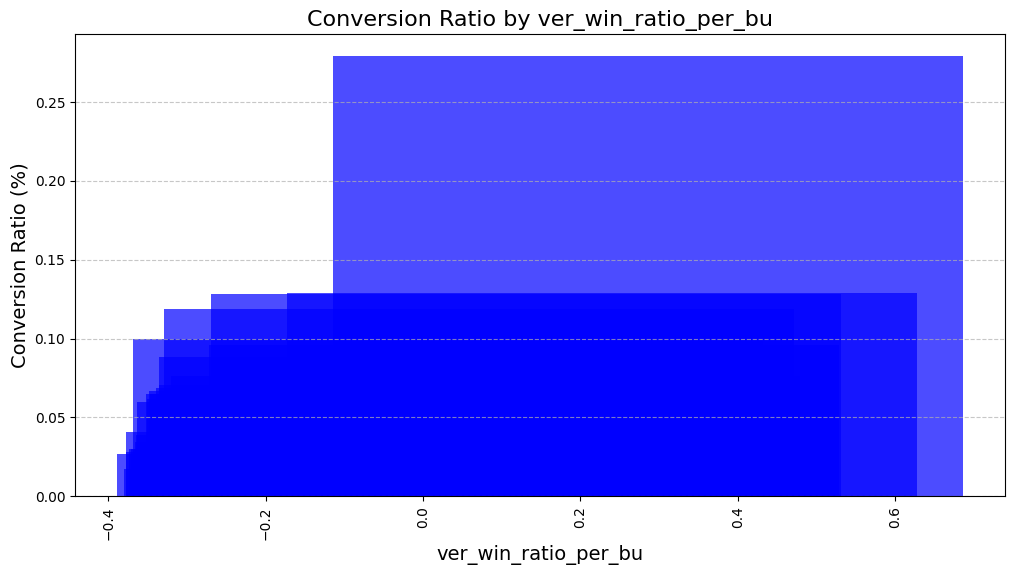

In [56]:
df_ver_win_ratio_per_bu = df.dropna(subset=['ver_win_ratio_per_bu'])

converted_counts_ver_win_ratio_per_bu = df_ver_win_ratio_per_bu.groupby('ver_win_ratio_per_bu')['is_converted'].sum().reset_index()
total_counts_ver_win_ratio_per_bu = df_ver_win_ratio_per_bu.groupby('ver_win_ratio_per_bu')['is_converted'].count().reset_index()

ratio_df_ver_win_ratio_per_bu = pd.merge(converted_counts_ver_win_ratio_per_bu, total_counts_ver_win_ratio_per_bu, on='ver_win_ratio_per_bu', how='left')
ratio_df_ver_win_ratio_per_bu['conversion_ratio'] = ratio_df_ver_win_ratio_per_bu['is_converted_x'] / ratio_df_ver_win_ratio_per_bu['is_converted_y']

for index, row in ratio_df_ver_win_ratio_per_bu.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['ver_win_ratio_per_bu']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))
plt.bar(ratio_df_ver_win_ratio_per_bu['ver_win_ratio_per_bu'], ratio_df_ver_win_ratio_per_bu['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Conversion Ratio by ver_win_ratio_per_bu', fontsize=16)
plt.xlabel('ver_win_ratio_per_bu', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
